In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/sungjinkim/Documents/Study/Machine_Learning'

In [3]:
train = pd.read_csv('./Data/4th_Competition/train.csv')
test = pd.read_csv('./Data/4th_Competition/test.csv')
print(train.shape)
print(test.shape)

(1216553, 13)
(5463, 12)


In [4]:
print(train.columns)
print(test.columns)

Index(['transaction_id', 'apartment_id', 'city', 'dong', 'jibun', 'apt',
       'addr_kr', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date', 'floor',
       'transaction_real_price'],
      dtype='object')
Index(['transaction_id', 'apartment_id', 'city', 'dong', 'jibun', 'apt',
       'addr_kr', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date', 'floor'],
      dtype='object')


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [6]:
for col in train.columns:
    print('{}\n'.format(train[col].head()))

0    0
1    1
2    2
3    3
4    4
Name: transaction_id, dtype: int64

0     7622
1     5399
2     3578
3    10957
4    10639
Name: apartment_id, dtype: int64

0    서울특별시
1    서울특별시
2    서울특별시
3    서울특별시
4    서울특별시
Name: city, dtype: object

0    신교동
1    필운동
2    필운동
3    내수동
4    내수동
Name: dong, dtype: object

0      6-13
1       142
2     174-1
3        95
4    110-15
Name: jibun, dtype: object

0    신현(101동)
1      사직파크맨션
2      두레엘리시안
3       파크팰리스
4        킹스매너
Name: apt, dtype: object

0    신교동 6-13 신현(101동)
1       필운동 142 사직파크맨션
2     필운동 174-1 두레엘리시안
3         내수동 95 파크팰리스
4      내수동 110-15 킹스매너
Name: addr_kr, dtype: object

0     84.82
1     99.17
2     84.74
3    146.39
4    194.43
Name: exclusive_use_area, dtype: float64

0    2002
1    1973
2    2007
3    2003
4    2004
Name: year_of_completion, dtype: int64

0    200801
1    200801
2    200801
3    200801
4    200801
Name: transaction_year_month, dtype: int64

0    21~31
1     1~10
2     1~10
3    11~20
4    21~31
Name: 

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [8]:
num_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]
num_cols

['transaction_id',
 'apartment_id',
 'exclusive_use_area',
 'year_of_completion',
 'transaction_year_month',
 'floor',
 'transaction_real_price']

In [9]:
train[num_cols].describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06
mean,6.091530e+05,6.299685e+03,7.816549e+01,1.998297e+03,2.012984e+05,9.343291e+00,3.822769e+04
std,3.526198e+05,3.581169e+03,2.915113e+01,8.941347e+00,2.905732e+02,6.606500e+00,3.104898e+04
min,0.000000e+00,0.000000e+00,9.260000e+00,1.961000e+03,2.008010e+05,-4.000000e+00,1.000000e+02
25%,3.041380e+05,3.345000e+03,5.976000e+01,1.993000e+03,2.010100e+05,4.000000e+00,1.900000e+04
50%,6.082760e+05,5.964000e+03,8.241000e+01,1.999000e+03,2.013120e+05,8.000000e+00,3.090000e+04
75%,9.124140e+05,9.436000e+03,8.497000e+01,2.005000e+03,2.015110e+05,1.300000e+01,4.700000e+04
max,1.234827e+06,1.265800e+04,4.243200e+02,2.017000e+03,2.017110e+05,8.000000e+01,8.200000e+05


In [10]:
cat_cols = [col for col in train.columns if train[col].dtype in ['object']]
train[cat_cols].describe()

,city,dong,jibun,apt,addr_kr,transaction_date
count,1216553,1216553,1216553,1216553,1216553,1216553
unique,2,473,8961,10440,12533,6
top,서울특별시,상계동,176-30,현대,용호동 944 오륙도에스케이뷰,11~20
freq,742285,29346,6594,13154,3220,408385


In [11]:
for col in cat_cols:
    uniq = np.unique(train[col].astype(str))
    print('-' * 20, 'col :', col,'       n_uniq : ', len(uniq), '-'*20)
    print(uniq)

-------------------- col : city        n_uniq :  2 --------------------
['부산광역시' '서울특별시']
-------------------- col : dong        n_uniq :  473 --------------------
['가락동' '가리봉동' '가산동' '가야동' '가양동' '갈월동' '갈현동' '감만동' '감전동' '감천동' '강일동' '개금동'
 '개봉동' '개포동' '거여동' '거제동' '견지동' '고덕동' '고척동' '공덕동' '공릉동' '공항동' '광안동' '광장동'
 '괘법동' '괴정동' '교남동' '교북동' '구기동' '구로동' '구산동' '구서동' '구수동' '구의동' '구평동' '구포동'
 '군자동' '궁동' '금곡동' '금사동' '금호동1가' '금호동2가' '금호동3가' '금호동4가' '기장읍 교리' '기장읍 내리'
 '기장읍 대라리' '기장읍 대변리' '기장읍 동부리' '기장읍 서부리' '기장읍 청강리' '길동' '길음동' '낙민동' '낙원동'
 '남가좌동' '남대문로5가' '남부민동' '남산동' '남산동2가' '남창동' '남천동' '남항동1가' '남항동2가' '남항동3가'
 '남현동' '내곡동' '내발산동' '내수동' '냉천동' '노고산동' '노량진동' '녹번동' '녹산동' '논현동' '누상동' '능동'
 '다대동' '답십리동' '당감동' '당리동' '당산동' '당산동1가' '당산동2가' '당산동3가' '당산동4가' '당산동5가'
 '당산동6가' '당주동' '대교동1가' '대교동2가' '대림동' '대방동' '대연동' '대저1동' '대조동' '대창동1가'
 '대청동1가' '대청동2가' '대청동4가' '대치동' '대평동1가' '대현동' '대흥동' '덕천동' '덕포동' '도곡동' '도림동'
 '도봉동' '도선동' '도원동' '도화동' '독산동' '돈암동' '동광동5가' '동교동' '동대신동1가' '동대신동2가'
 '동대신동3가' '동빙고동' '동삼동' '동선동1가' '동

In [12]:
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family='NamumGothicOTF')
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

findfont: Font family ['NamumGothicOTF'] not found. Falling back to DejaVu Sans.


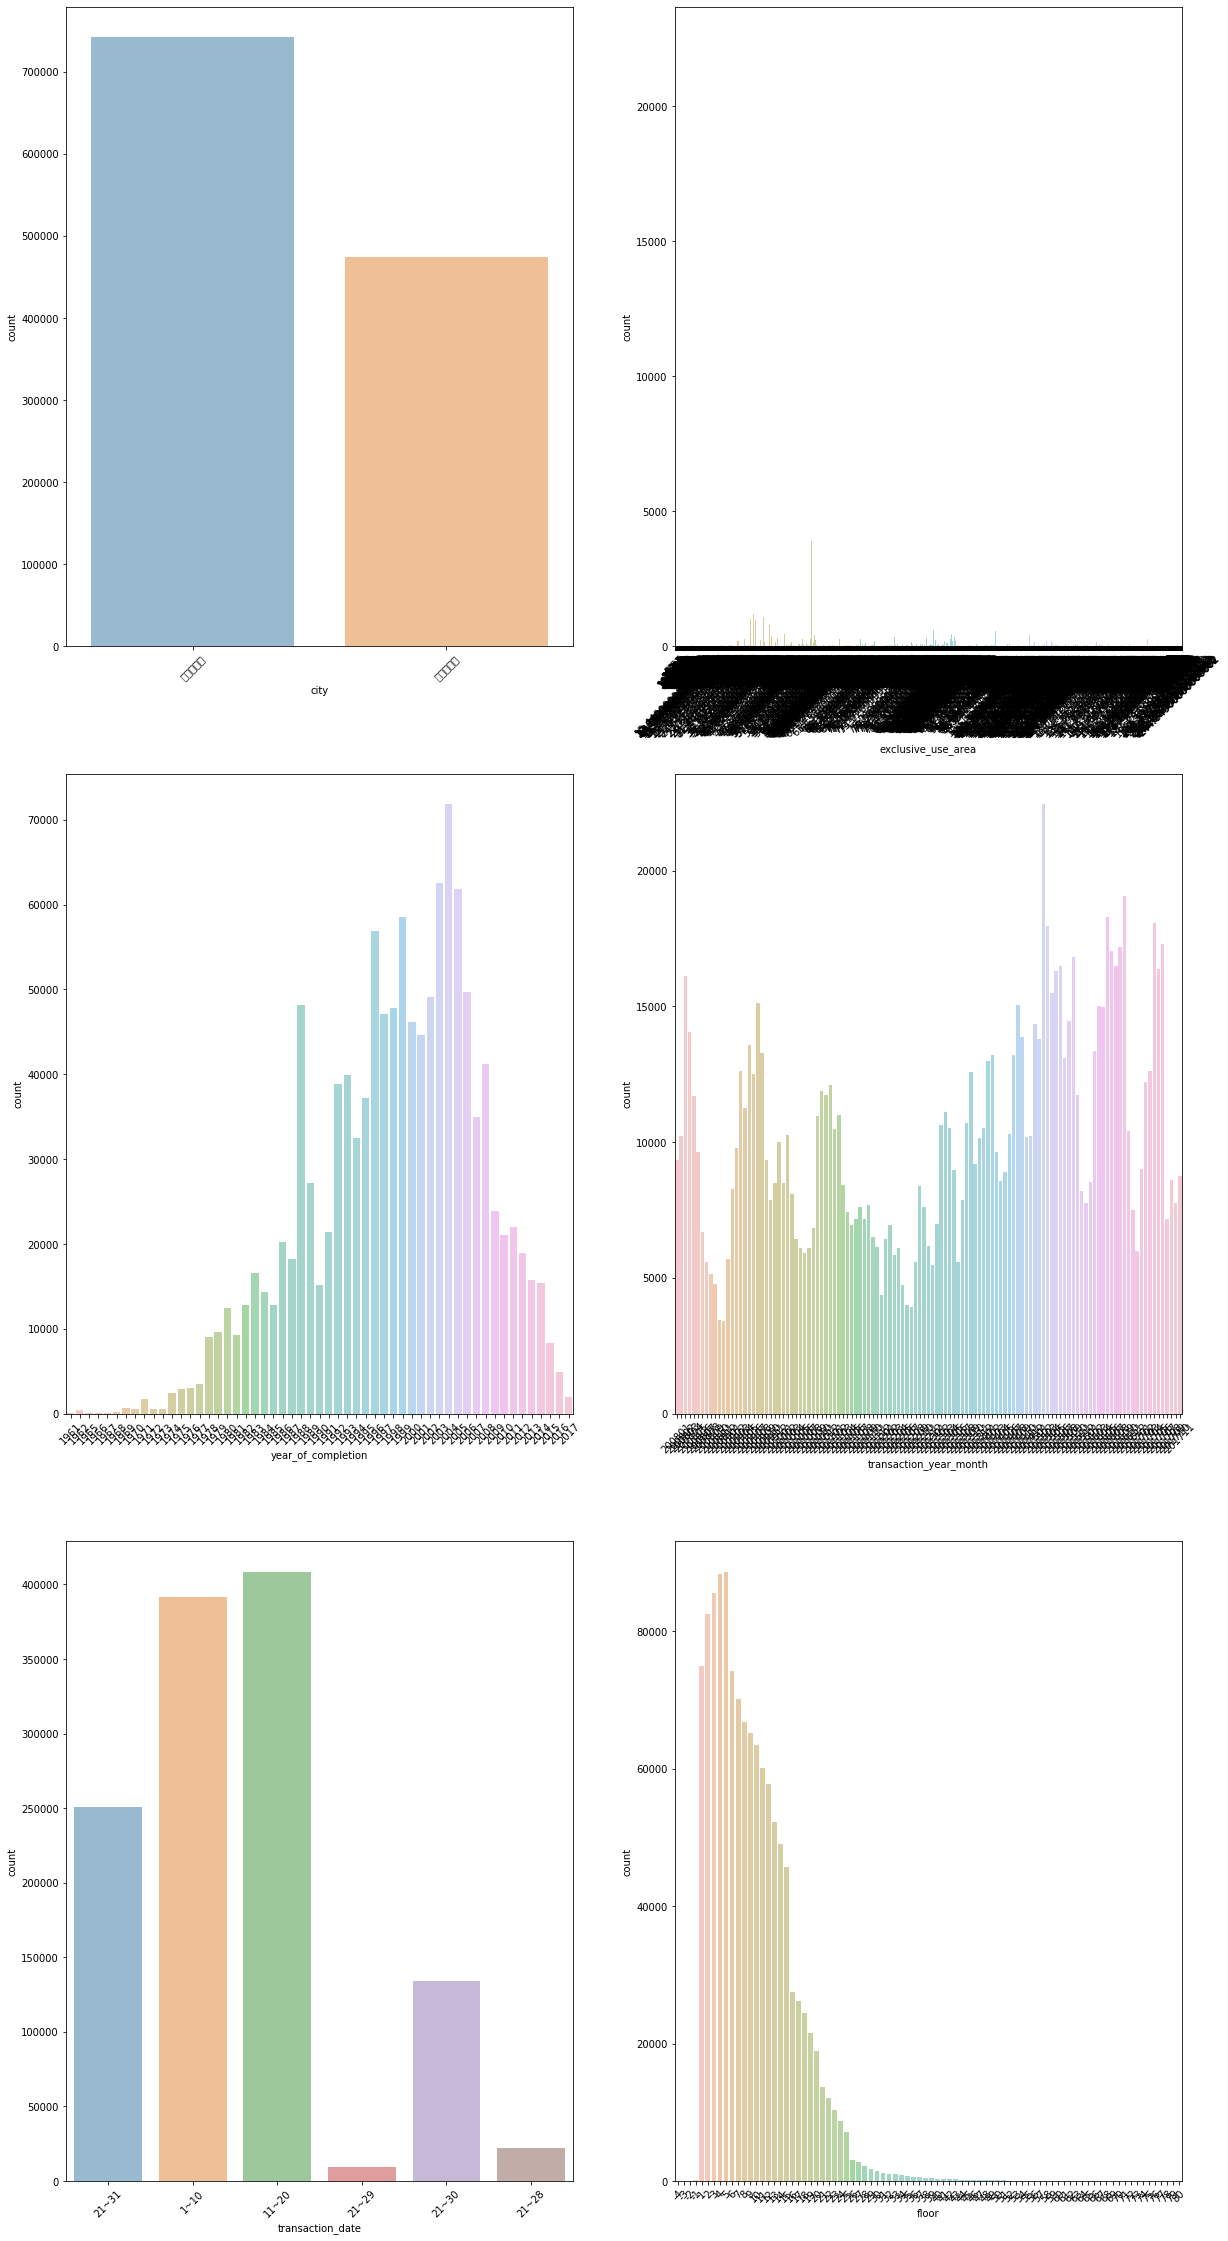

In [13]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('./multipage.pdf')

skip_cols = ['transaction_id', 'apartment_id', 'jibun', 'apt',
            'transaction_real_price', 'addr_kr', 'dong']
i = 0
plt.subplots(figsize=(20, 40))
for col in train.columns:
    if col in skip_cols: continue
    i += 1
    plt.subplot(3, 2, i)
    chart = sns.countplot(x=col, data=train, alpha=0.5)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    
plt.show()

In [14]:
def gubun_data_area(x):
    div = x // 50
    return str(div * 50) + '~' + str((div+1) * 50 - 1)

In [15]:
train['gugan_exclusive_use_area'] = train['exclusive_use_area'].apply(lambda x: gubun_data_area(x))
train['gugan_exclusive_use_area'].unique()

array(['50.0~99.0', '100.0~149.0', '150.0~199.0', '0.0~49.0',
       '200.0~249.0', '250.0~299.0', '300.0~349.0', '400.0~449.0'],
      dtype=object)

In [16]:
order_area = train.sort_values(by='exclusive_use_area',
                               ascending=True).gugan_exclusive_use_area.unique()
order_area

array(['0.0~49.0', '50.0~99.0', '100.0~149.0', '150.0~199.0',
       '200.0~249.0', '250.0~299.0', '300.0~349.0', '400.0~449.0'],
      dtype=object)

In [17]:
train['transaction_year_month'] = train['transaction_year_month'].astype(str)
train['tyear'] = train['transaction_year_month'].str.slice(start=0, stop=4)
train['tyear'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'], dtype=object)

In [18]:
train['tmonth'] = train['transaction_year_month'].str.slice(start=4, stop=6)
train['tmonth'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [19]:
def gubun_data_date(x):
    if x == '1~10': gubun_str = '10'
    elif x == '11~20': gubun_str='20'
    else: gubun_str = '30'
    return gubun_str

In [20]:
train['tdata'] = train['transaction_date'].apply(lambda x: gubun_data_date(x))
train['tdata'].unique()

array(['30', '10', '20'], dtype=object)

In [21]:
def gubun_data_price(x):
    scale = 25000
    div = x // scale
    return str(div * scale) + '~' + str((div + 1) * scale - 1)

In [22]:
train['gugan_transaction_real_price']=train['transaction_real_price'].apply(lambda x: gubun_data_price(x))
train['gugan_transaction_real_price'].unique()

array(['25000~49999', '0~24999', '100000~124999', '50000~74999',
       '75000~99999', '125000~149999', '150000~174999', '200000~224999',
       '175000~199999', '225000~249999', '250000~274999', '300000~324999',
       '400000~424999', '375000~399999', '550000~574999', '350000~374999',
       '275000~299999', '325000~349999', '450000~474999', '650000~674999',
       '625000~649999', '750000~774999', '425000~449999', '600000~624999',
       '675000~699999', '700000~724999', '775000~799999', '575000~599999',
       '525000~549999', '800000~824999', '475000~499999', '500000~524999',
       '725000~749999'], dtype=object)

In [23]:
order_price = train.sort_values(by='transaction_real_price',
                               ascending=True).gugan_transaction_real_price.unique()
order_price

array(['0~24999', '25000~49999', '50000~74999', '75000~99999',
       '100000~124999', '125000~149999', '150000~174999', '175000~199999',
       '200000~224999', '225000~249999', '250000~274999', '275000~299999',
       '300000~324999', '325000~349999', '350000~374999', '375000~399999',
       '400000~424999', '425000~449999', '450000~474999', '475000~499999',
       '500000~524999', '525000~549999', '550000~574999', '575000~599999',
       '600000~624999', '625000~649999', '650000~674999', '675000~699999',
       '700000~724999', '725000~749999', '750000~774999', '775000~799999',
       '800000~824999'], dtype=object)

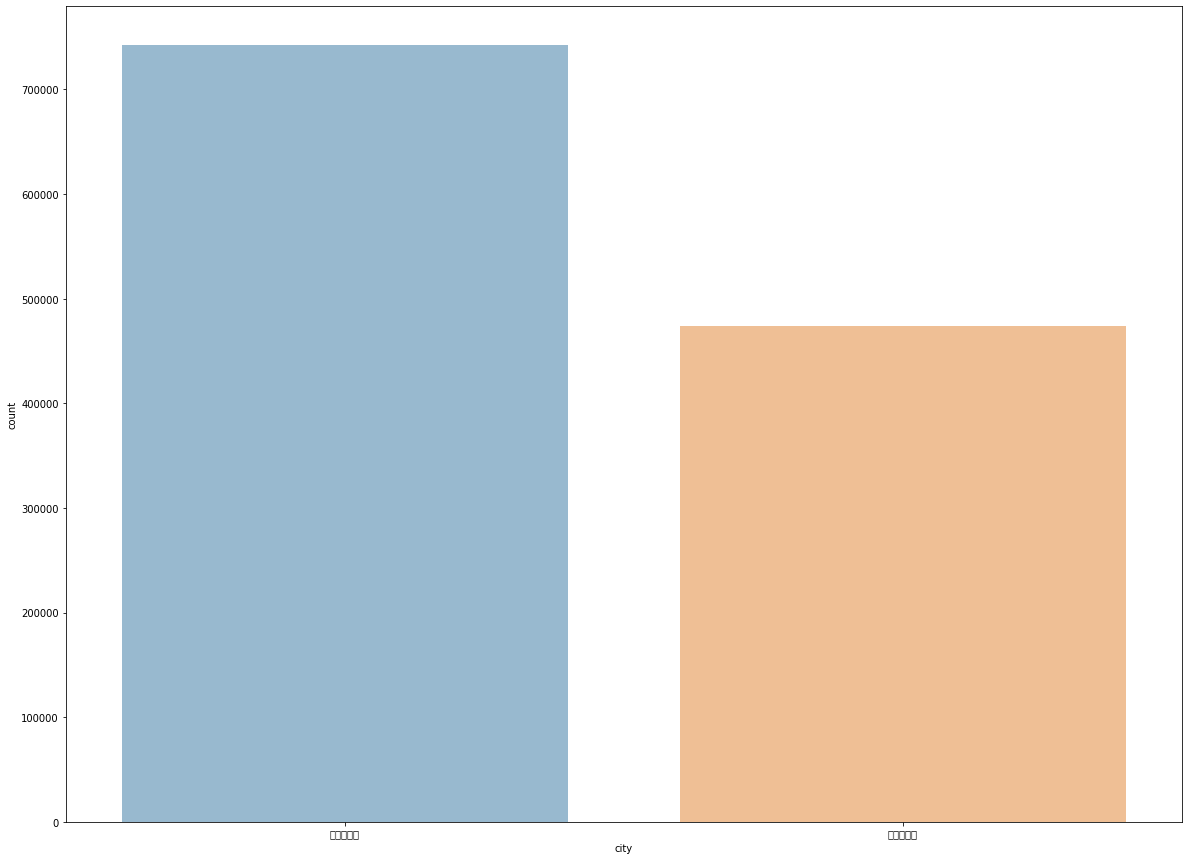

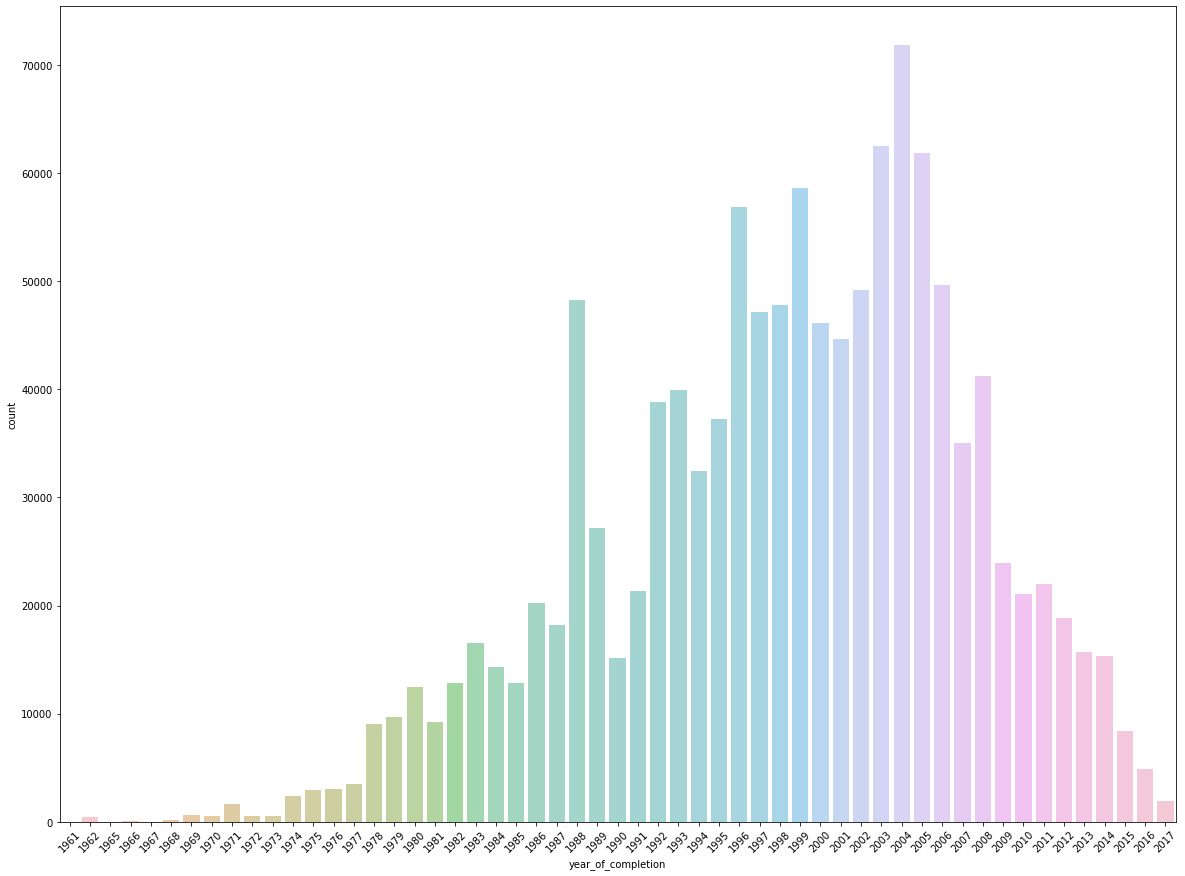

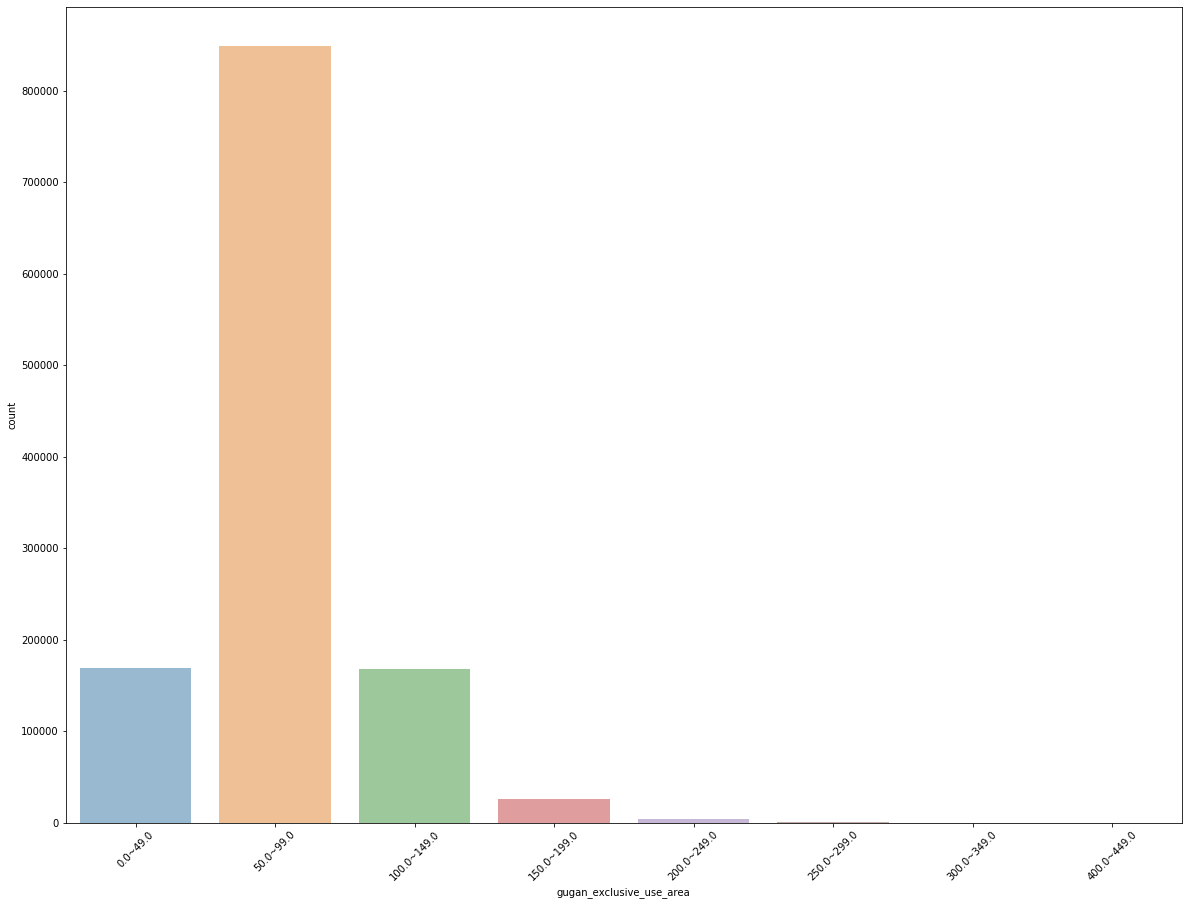

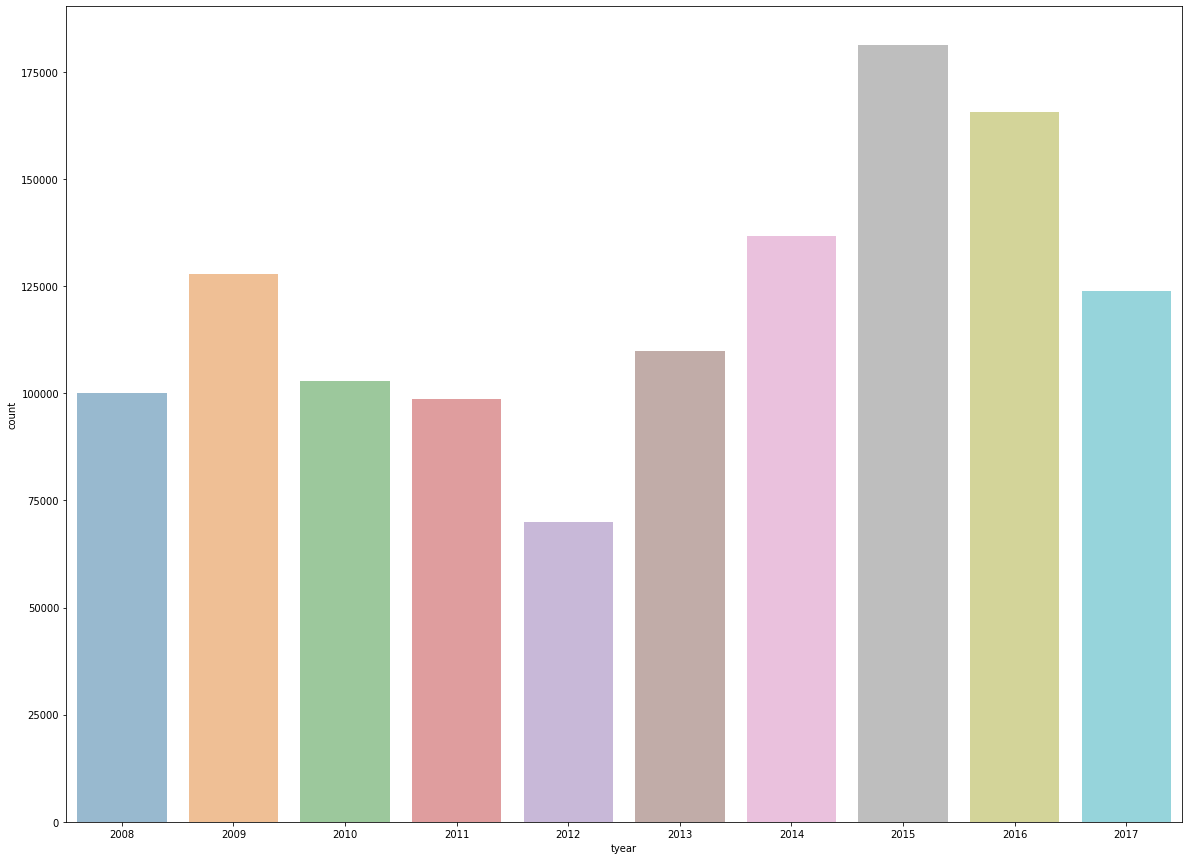

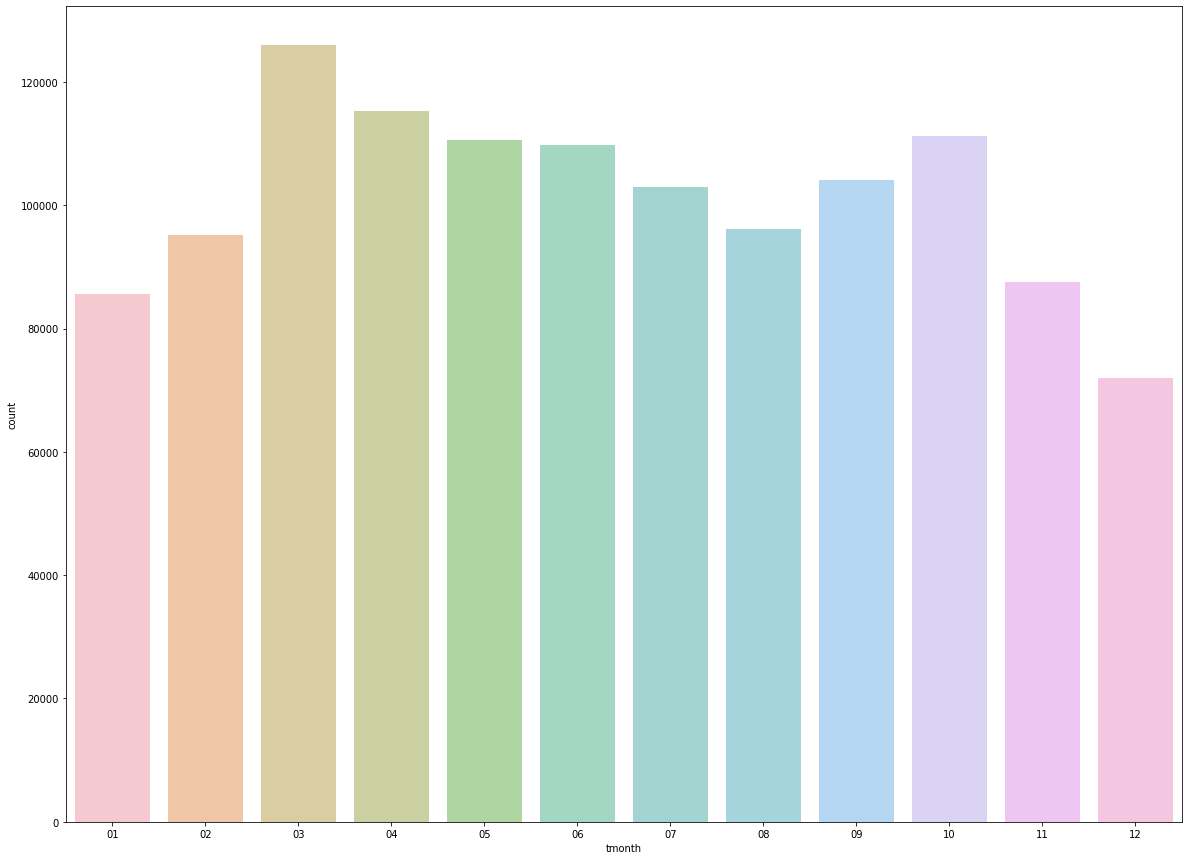

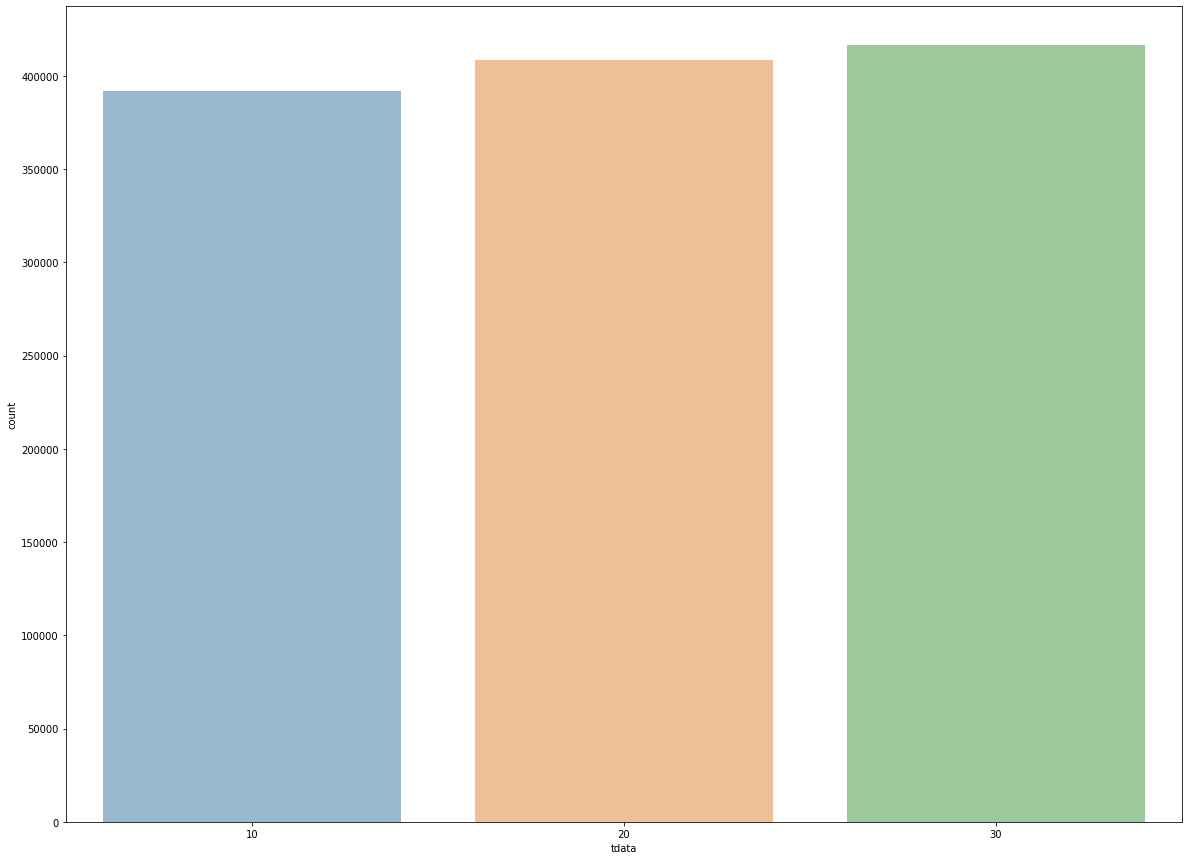

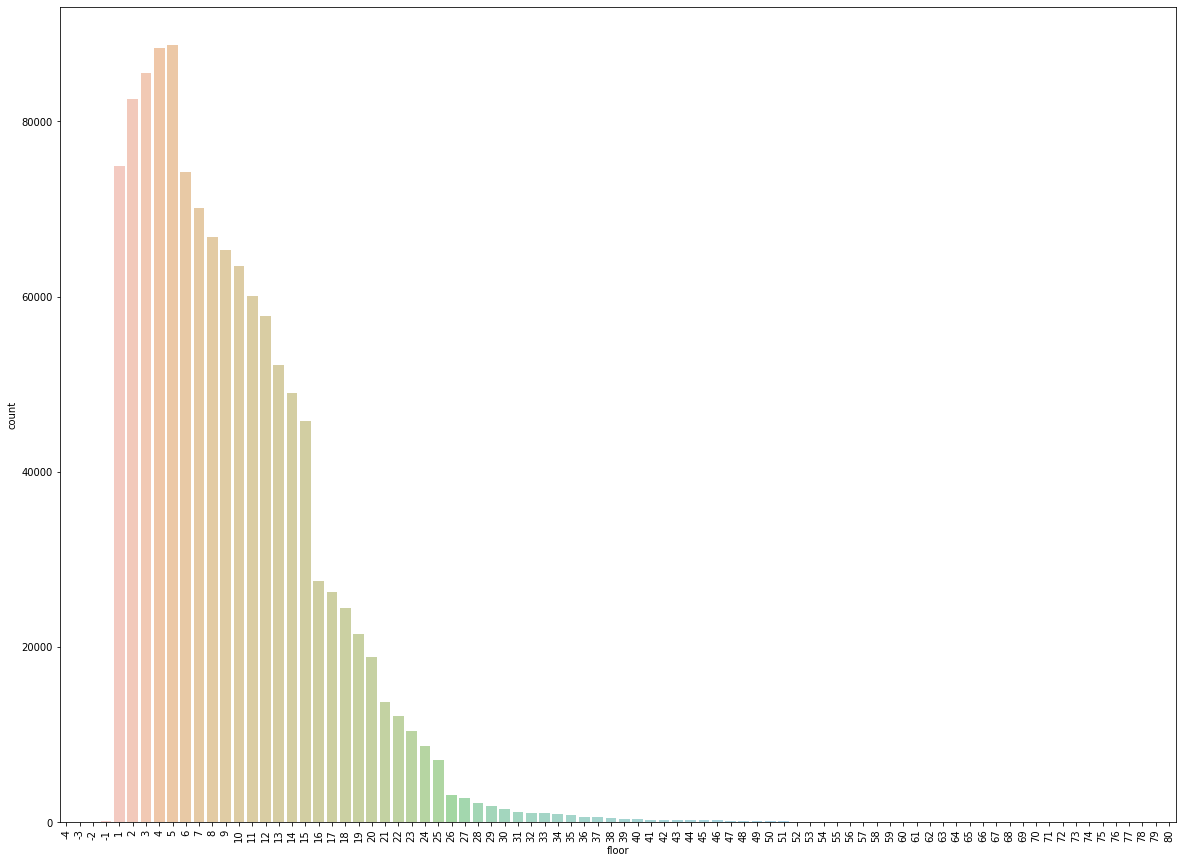

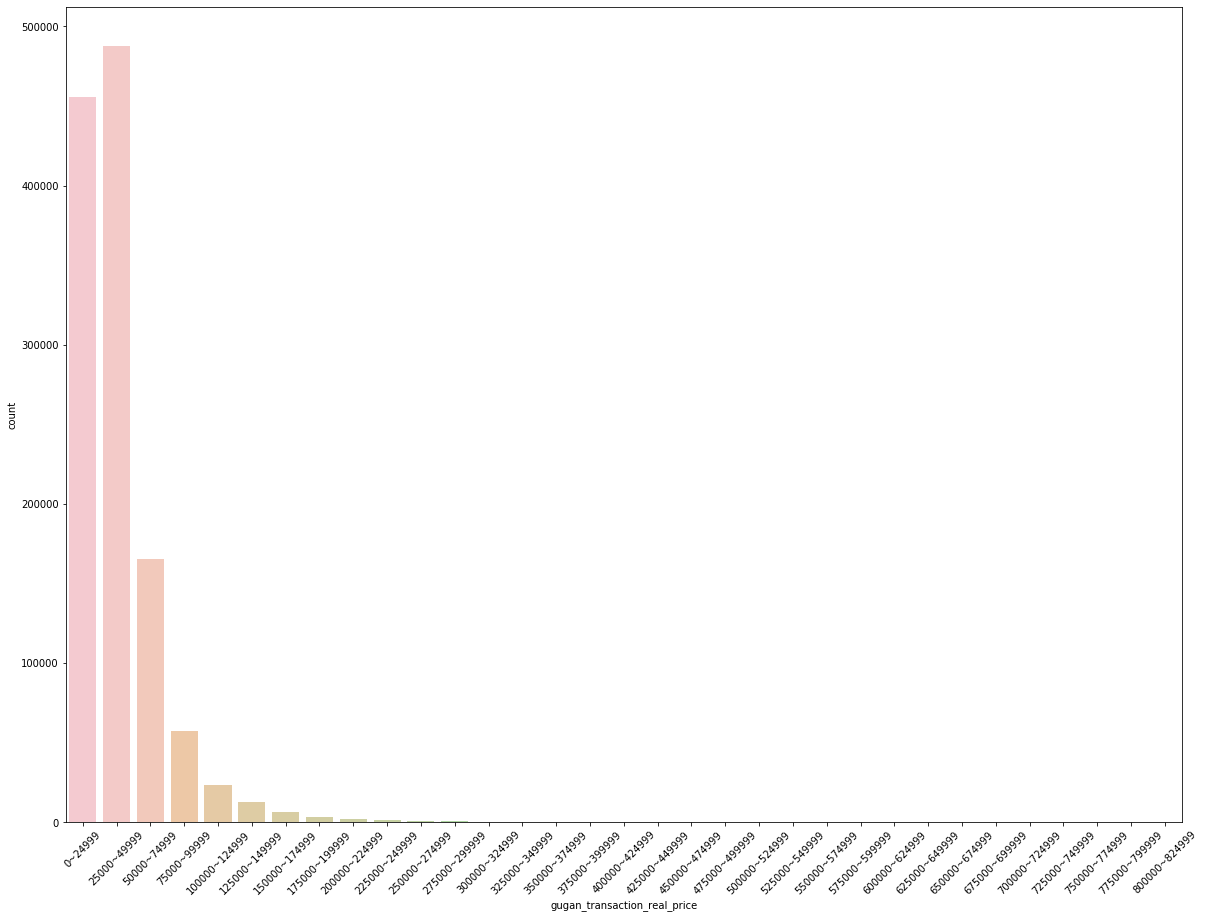

In [24]:
chart_data = [['city', 0, None],
             ['year_of_completion', 45, None],
             ['gugan_exclusive_use_area', 45, order_area],
             ['tyear', 0, None],
             ['tmonth', 0, None],
             ['tdata', 0, None],
             ['floor', 90, None],
             ['gugan_transaction_real_price', 45, order_price]]
i = 0
for col, deg, order in chart_data:
    i += 1
    f, ax = plt.subplots(figsize=(20, 15))
    chart = sns.countplot(x=col, data=train, alpha=0.5, order=order)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=deg)
    
plt.show()

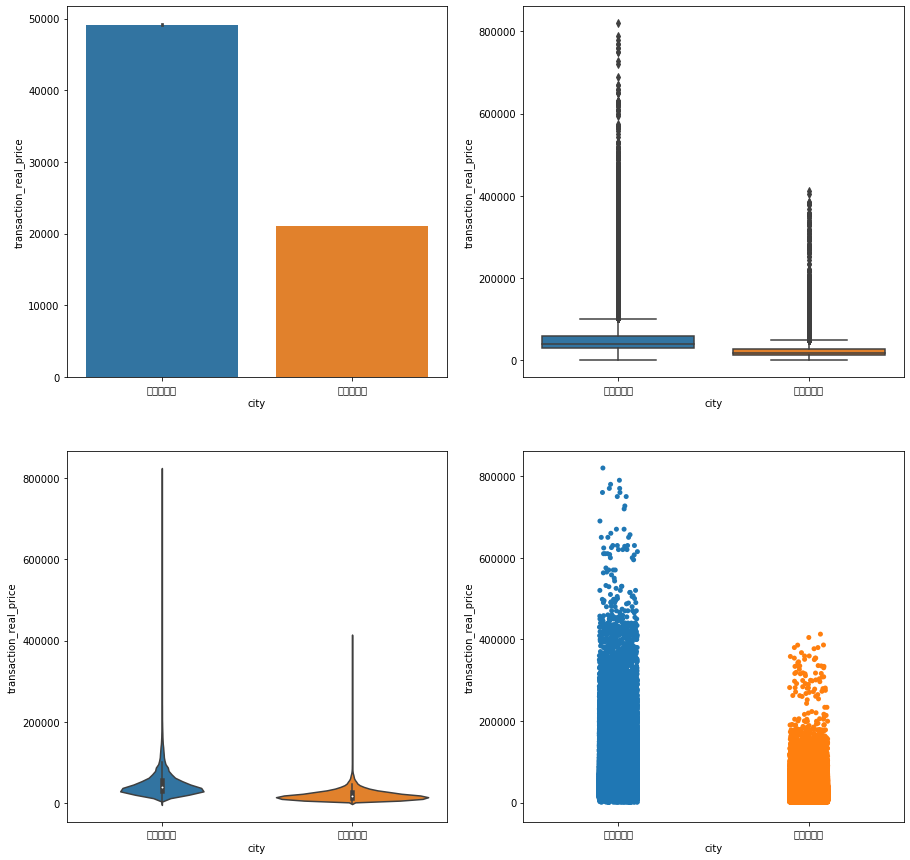

In [25]:
plt.subplots(figsize=(15, 15))
plt.subplot(221)
sns.barplot(x='city', y='transaction_real_price', data=train)
plt.subplot(222)
sns.boxplot(x='city', y='transaction_real_price', data=train)
plt.subplot(223)
sns.violinplot(x='city', y='transaction_real_price', data=train)
plt.subplot(224)
sns.stripplot(x='city', y='transaction_real_price', jitter=True, data=train)
plt.show()

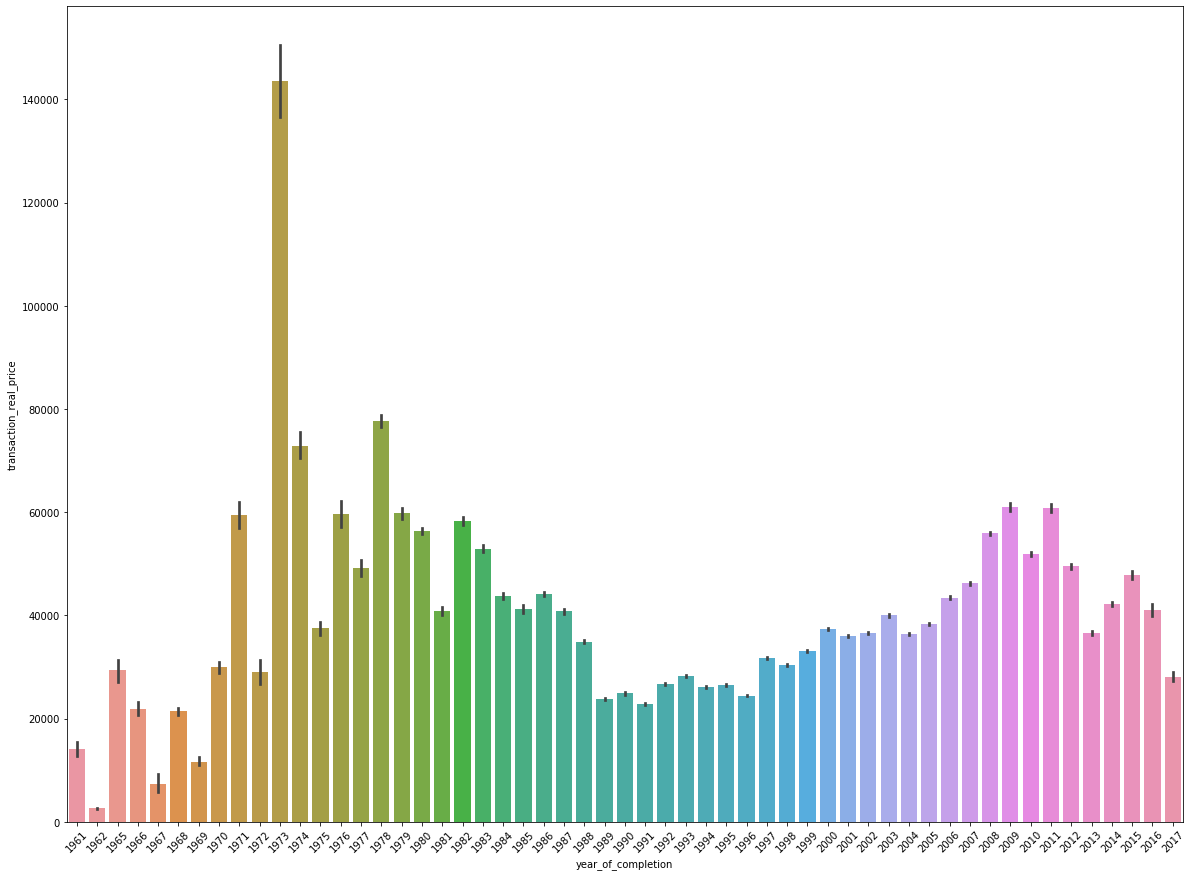

In [26]:
plt.subplots(figsize=(20, 15))
chart = sns.barplot(x='year_of_completion', y='transaction_real_price', data=train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

[Text(0, 0, '0.0~49.0'),
 Text(0, 0, '50.0~99.0'),
 Text(0, 0, '100.0~149.0'),
 Text(0, 0, '150.0~199.0'),
 Text(0, 0, '200.0~249.0'),
 Text(0, 0, '250.0~299.0'),
 Text(0, 0, '300.0~349.0'),
 Text(0, 0, '400.0~449.0')]

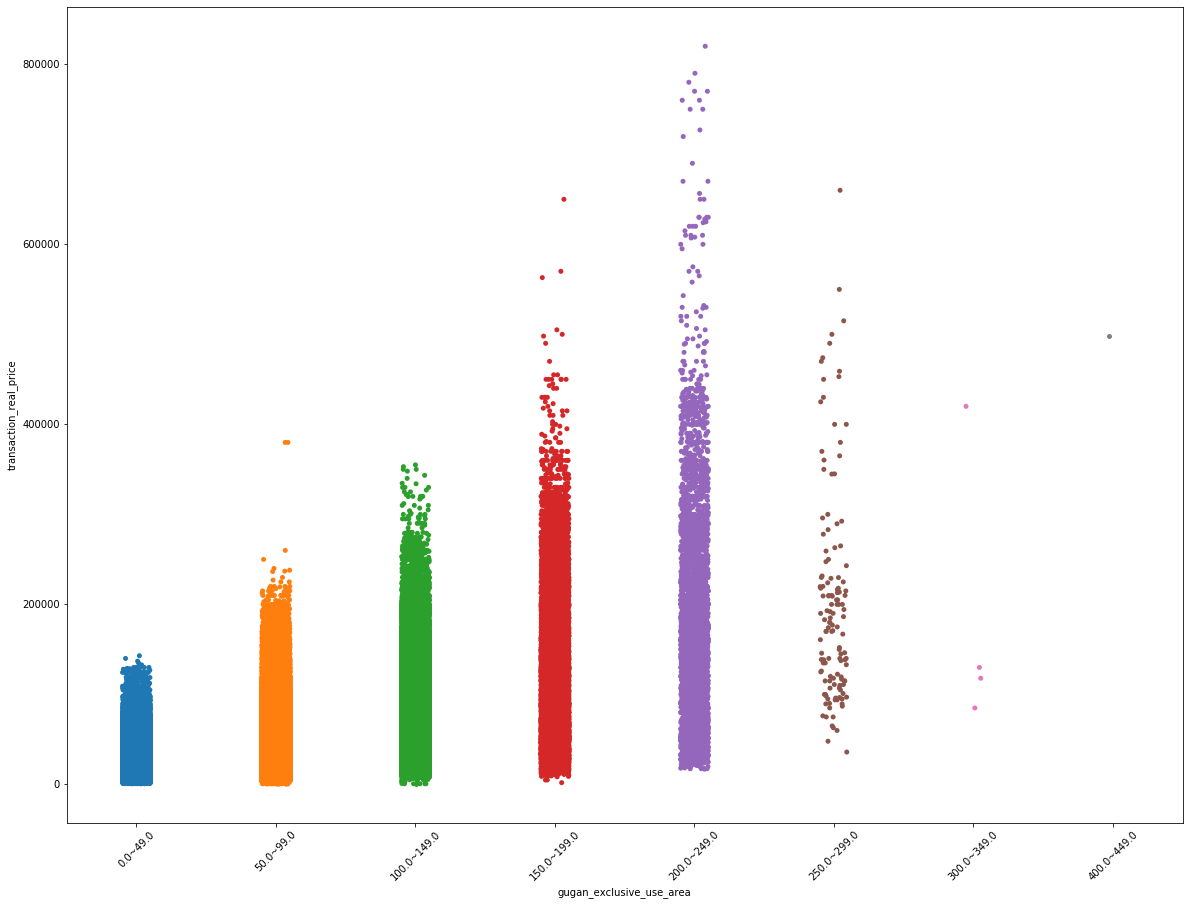

In [27]:
plt.subplots(figsize=(20, 15))
chart = sns.stripplot(x='gugan_exclusive_use_area', y='transaction_real_price',
                      data=train, jitter=True, order=order_area)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

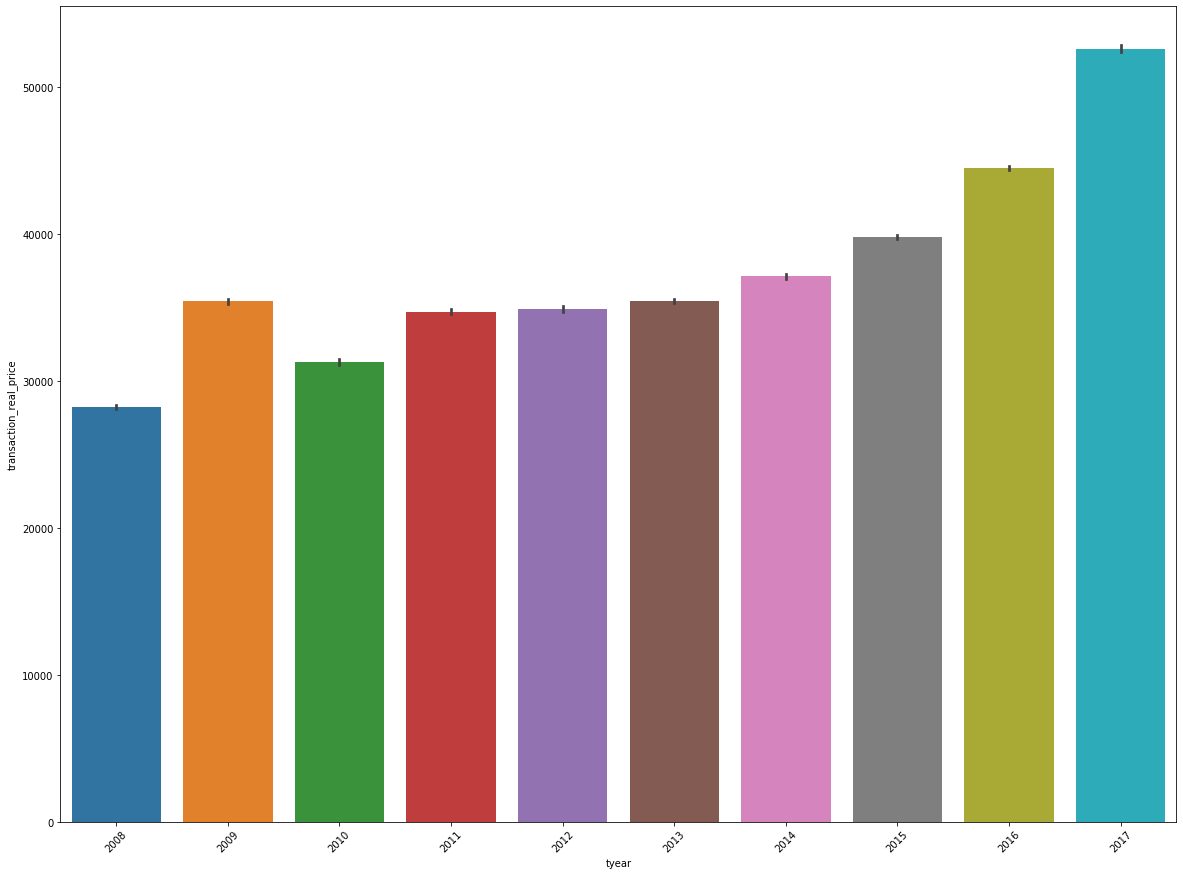

In [28]:
plt.subplots(figsize=(20, 15))
chart = sns.barplot(x='tyear', y='transaction_real_price', data=train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

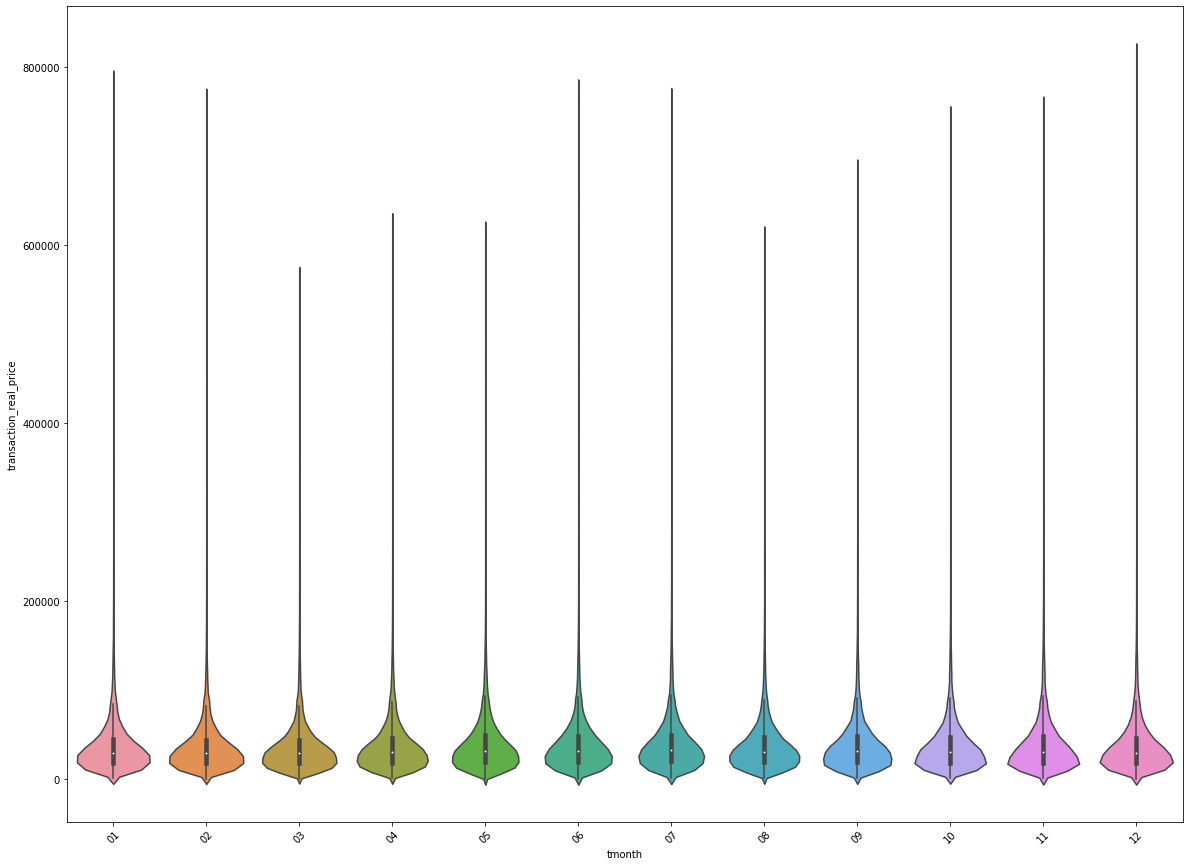

In [29]:
plt.subplots(figsize=(20, 15))
chart = sns.violinplot(x='tmonth', y='transaction_real_price', data=train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

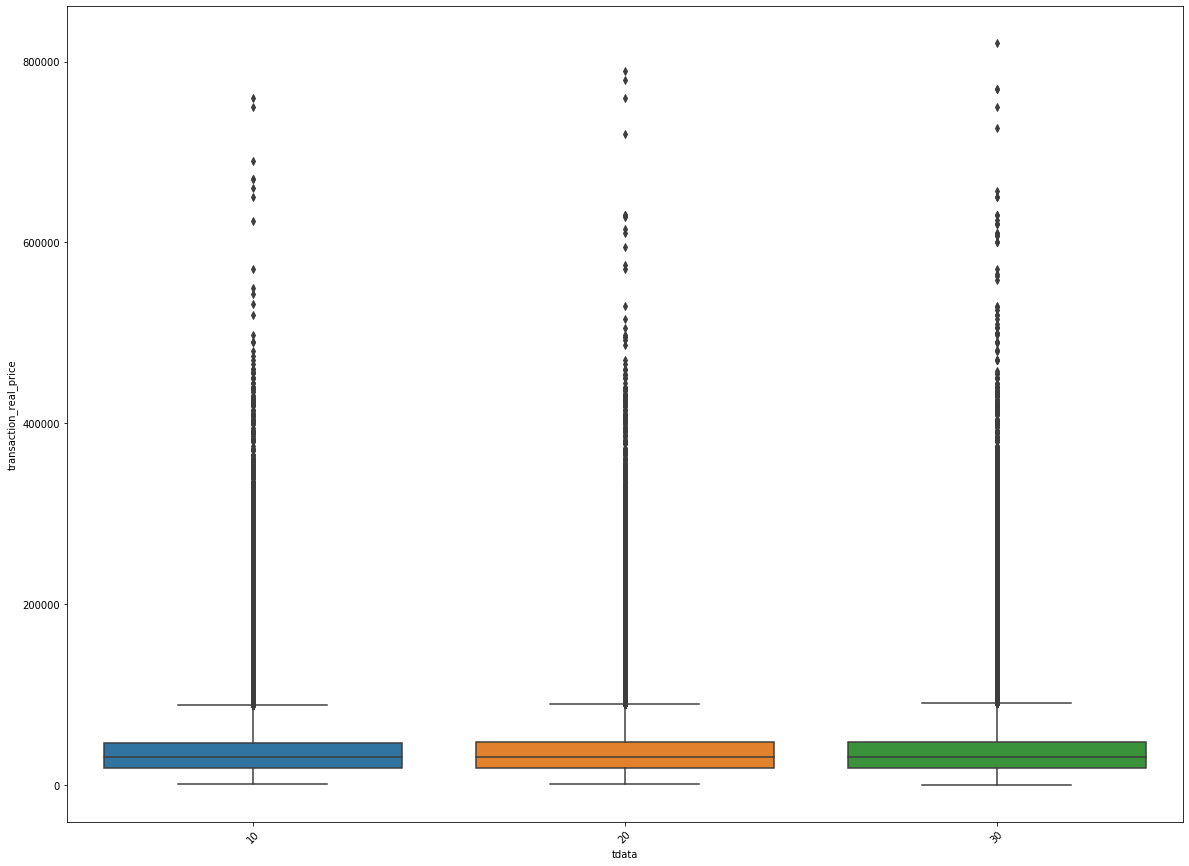

In [30]:
plt.subplots(figsize=(20, 15))
chart = sns.boxplot(x='tdata', y='transaction_real_price', data=train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

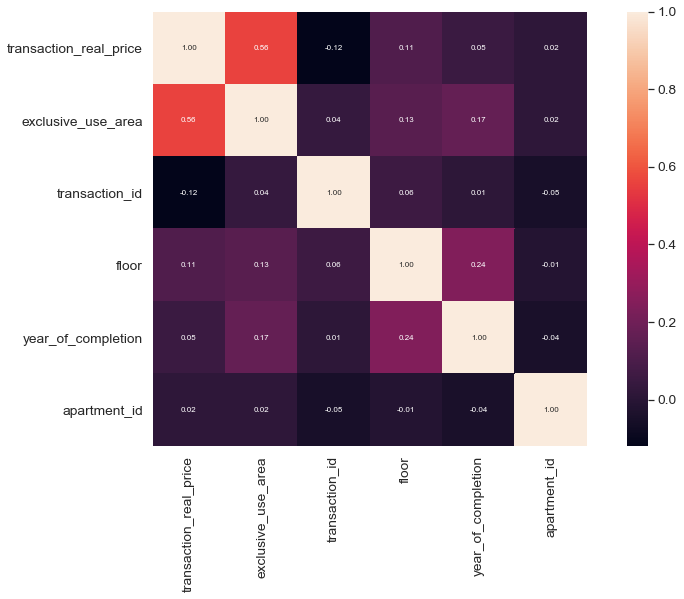

In [31]:
train_drop = train.dropna()
k = 15
corrmat = abs(train_drop.corr(method='pearson'))
cols = corrmat.nlargest(k, 'transaction_real_price').index
cm = np.corrcoef(train_drop[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(14, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                fmt='.2f', annot_kws={'size': 8},
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()

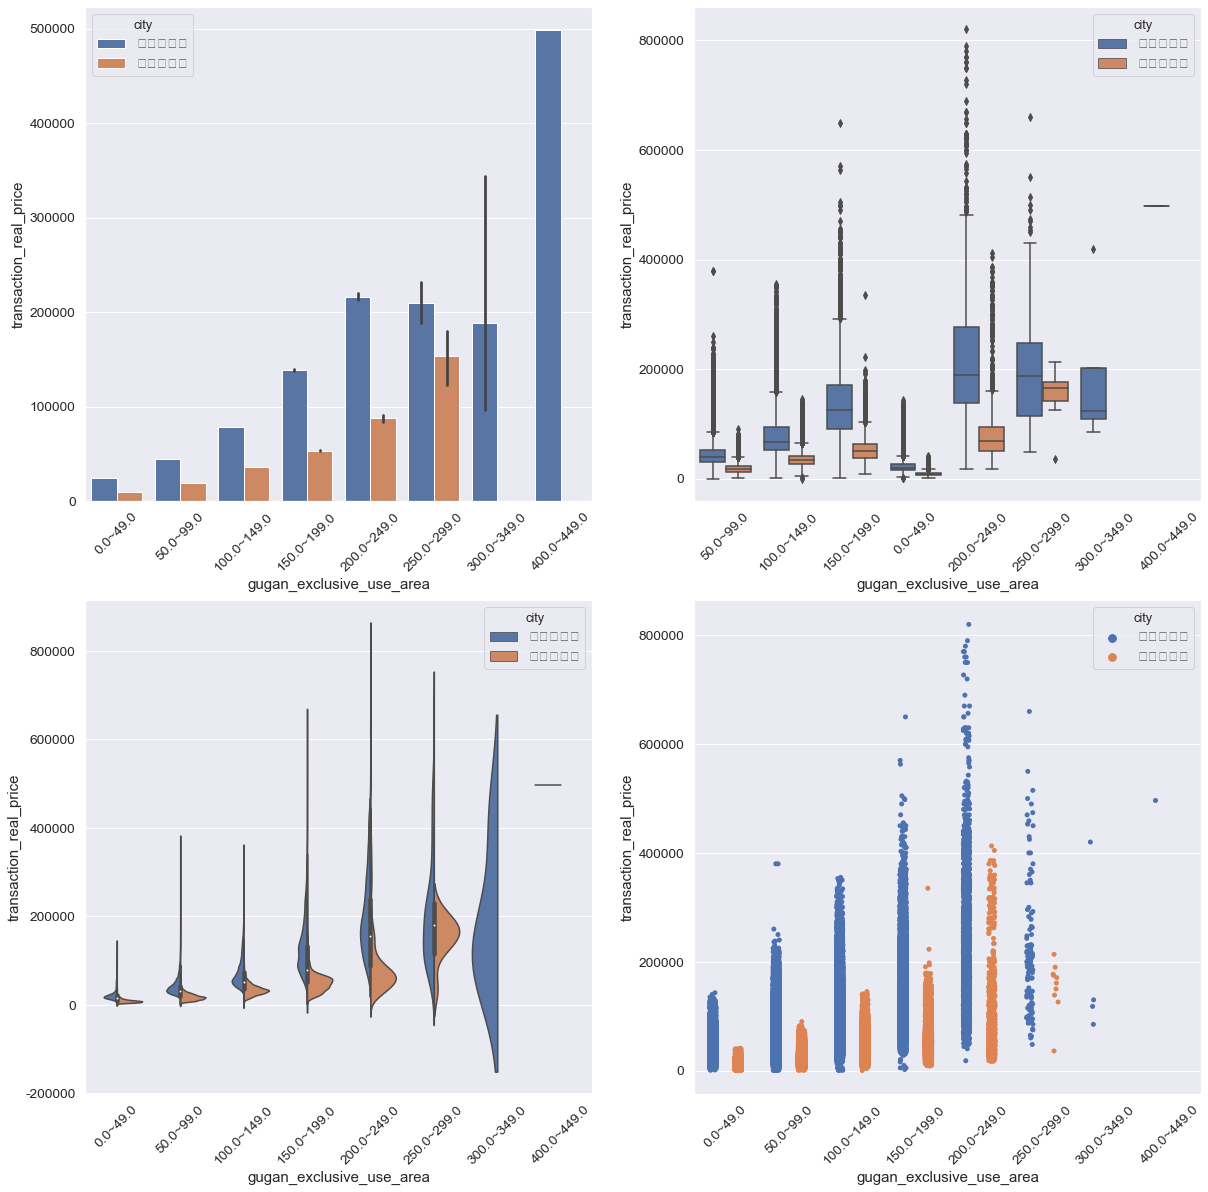

In [32]:
plt.subplots(figsize=(20, 20))
plt.subplot(221)
chart = sns.barplot(x='gugan_exclusive_use_area', y='transaction_real_price',
                   data=train, hue='city', order=order_area)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(222)
chart = sns.boxplot(x='gugan_exclusive_use_area', y='transaction_real_price',
                   hue='city', data=train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(223)
chart = sns.violinplot(x='gugan_exclusive_use_area', y='transaction_real_price',
                      data=train, jitter=True, hue='city', split=True, order=order_area)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(224)
chart = sns.stripplot(x='gugan_exclusive_use_area', y='transaction_real_price',
                     data=train, jitter=True, hue='city', split=True, order=order_area)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

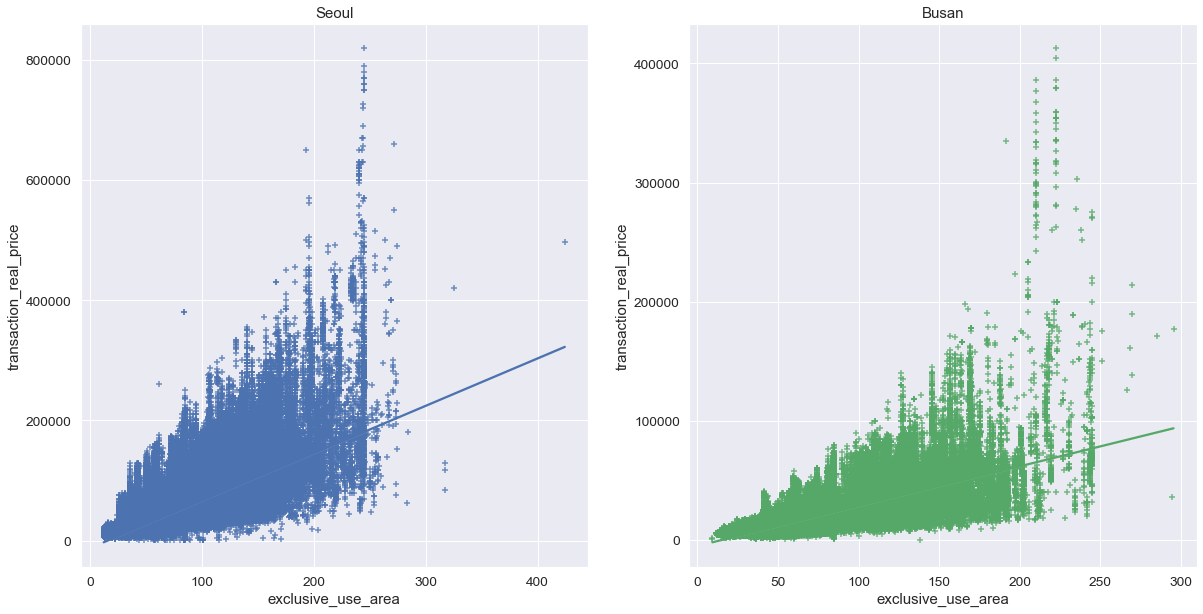

In [33]:
plt.subplots(figsize=(20, 10))
plt.subplot(121)
s_train = train[train['city']=='서울특별시']
sns.regplot(s_train['exclusive_use_area'], s_train['transaction_real_price'], marker='+')
plt.title('Seoul')

plt.subplot(122)
b_train = train[train['city'] == '부산광역시']
sns.regplot(b_train['exclusive_use_area'], b_train['transaction_real_price'], marker='+', color='g')
plt.title('Busan')

plt.show()

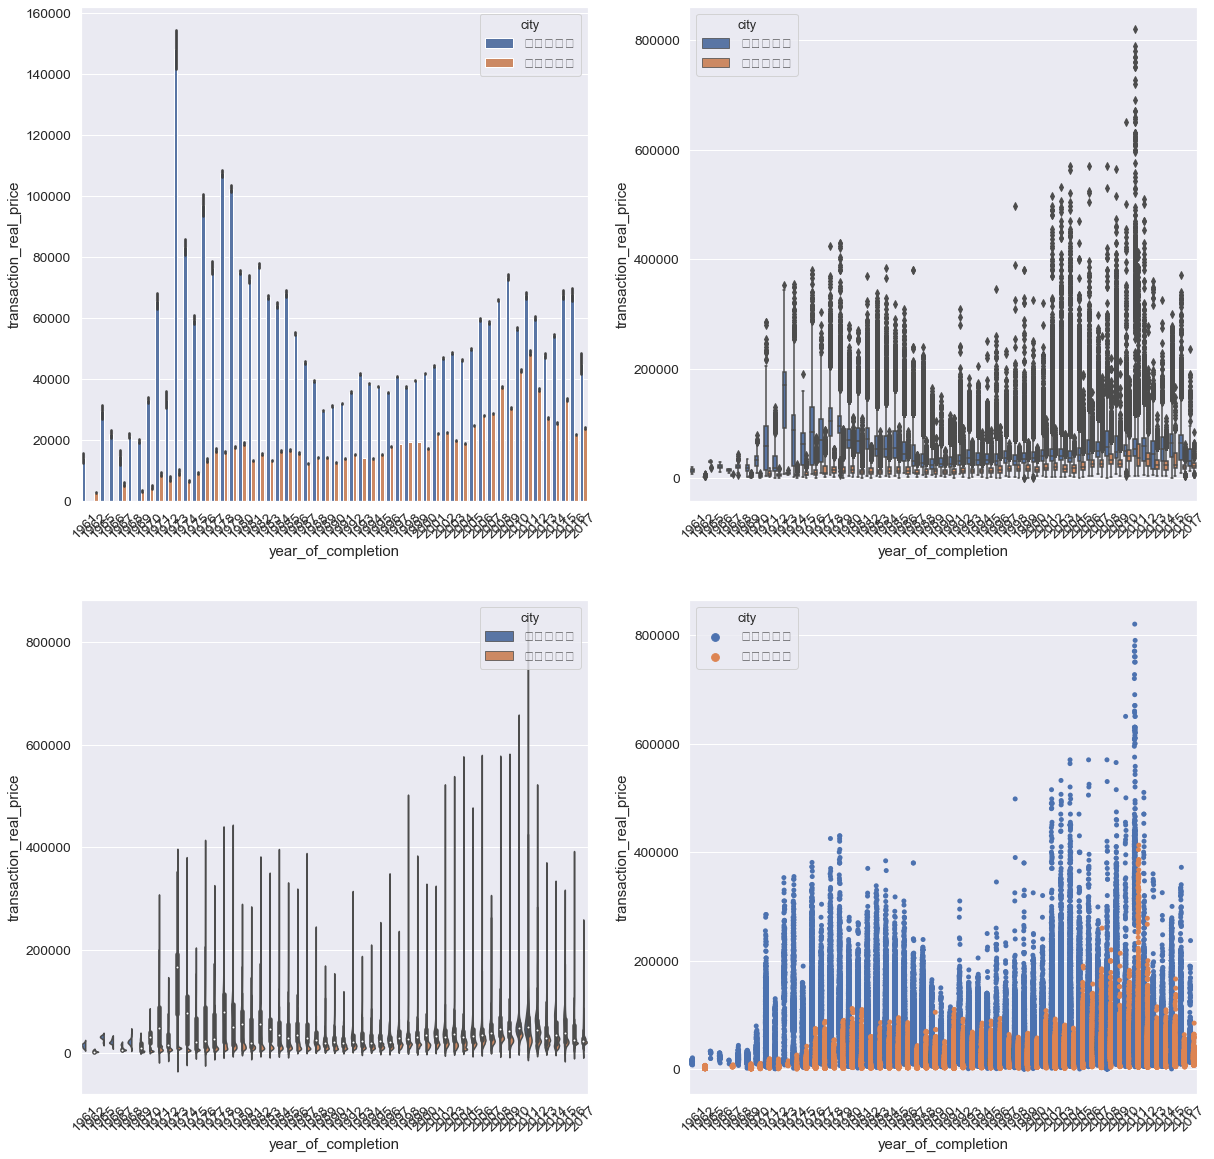

In [34]:
plt.subplots(figsize=(20, 20))

plt.subplot(221)
chart = sns.barplot(x='year_of_completion', y='transaction_real_price', data=train, hue='city')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(222)
chart = sns.boxplot(x='year_of_completion', y='transaction_real_price', hue='city', data=train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(223)
chart = sns.violinplot(x='year_of_completion', y='transaction_real_price', data=train, jitter=True, hue='city',split=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(224)
chart = sns.stripplot(x='year_of_completion', y='transaction_real_price', data=train, jitter=True, hue='city', split=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.show()

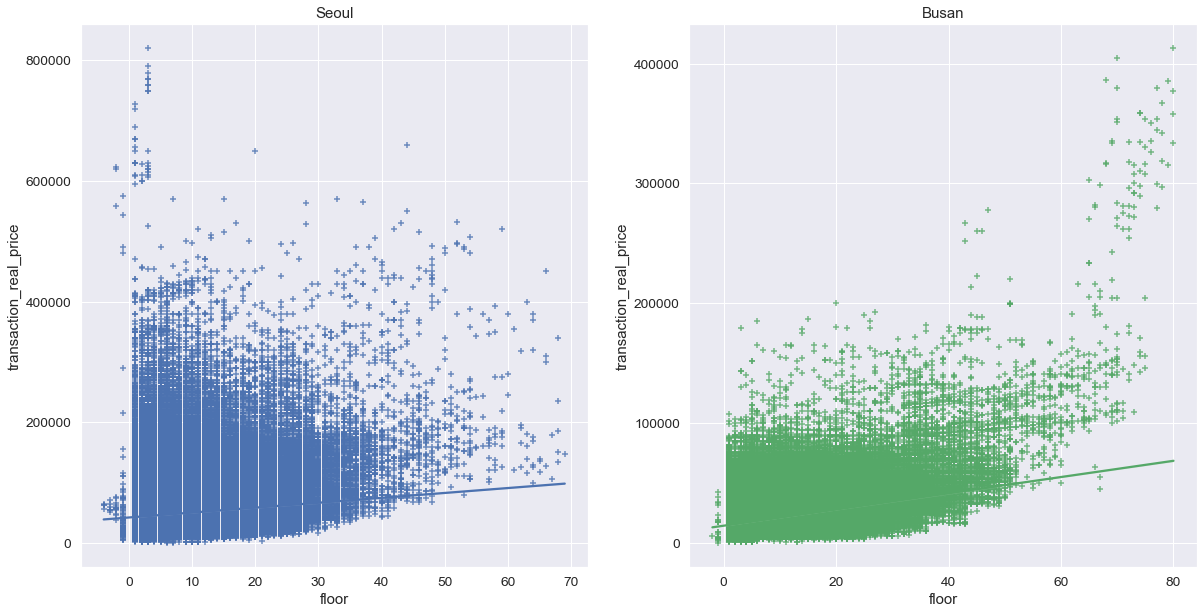

In [35]:
plt.subplots(figsize=(20, 10))
plt.subplot(121)
s_train = train[train['city']=='서울특별시']
sns.regplot(s_train['floor'], s_train['transaction_real_price'], marker='+')
plt.title('Seoul')

plt.subplot(122)
b_train = train[train['city'] == '부산광역시']
sns.regplot(b_train['floor'], b_train['transaction_real_price'], marker='+', color='g')
plt.title('Busan')

plt.show()

In [37]:
print('훈련용 데이터\n',
      train.sort_values(by='transaction_year_month', ascending=True).transaction_year_month.unique())
print('훈련용 데이터\n',
      test.sort_values(by='transaction_year_month', ascending=True).transaction_year_month.unique())

훈련용 데이터
 ['200801' '200802' '200803' '200804' '200805' '200806' '200807' '200808'
 '200809' '200810' '200811' '200812' '200901' '200902' '200903' '200904'
 '200905' '200906' '200907' '200908' '200909' '200910' '200911' '200912'
 '201001' '201002' '201003' '201004' '201005' '201006' '201007' '201008'
 '201009' '201010' '201011' '201012' '201101' '201102' '201103' '201104'
 '201105' '201106' '201107' '201108' '201109' '201110' '201111' '201112'
 '201201' '201202' '201203' '201204' '201205' '201206' '201207' '201208'
 '201209' '201210' '201211' '201212' '201301' '201302' '201303' '201304'
 '201305' '201306' '201307' '201308' '201309' '201310' '201311' '201312'
 '201401' '201402' '201403' '201404' '201405' '201406' '201407' '201408'
 '201409' '201410' '201411' '201412' '201501' '201502' '201503' '201504'
 '201505' '201506' '201507' '201508' '201509' '201510' '201511' '201512'
 '201601' '201602' '201603' '201604' '201605' '201606' '201607' '201608'
 '201609' '201610' '201611' '201612' '2017

In [38]:
test = test.append(pd.Series([99797, 4934, '부산광역시', '좌동', '1321', '벽산1',
                             '좌동 1321', 84.9900, 1996, 200801, '11~20', 13], index=test.columns), ignore_index=True)

In [39]:
train['transaction_year_month'] = train['transaction_year_month'].astype(int)
train.sort_values(by=['transaction_year_month'], ascending=True, inplace=True)
test.sort_values(by=['transaction_year_month'], ascending=True, inplace=True)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

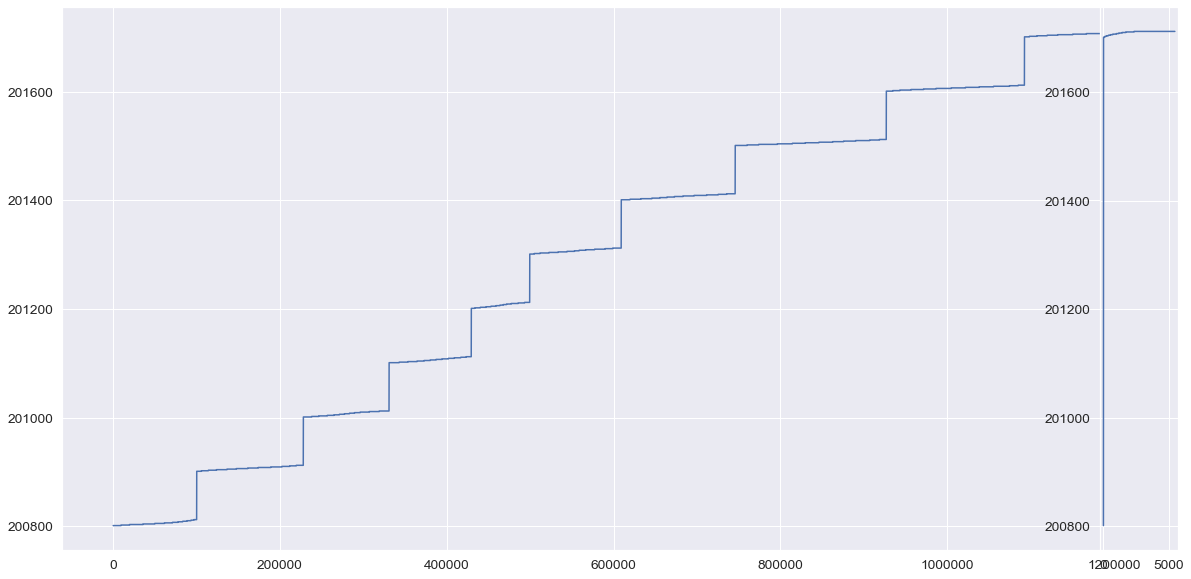

In [40]:
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1,1,1)
train['transaction_year_month'].plot()
fig.add_subplot(1, 12, 12)
test['transaction_year_month'].plot()

In [41]:
print(test.shape)

(5464, 12)


In [43]:
test = test[test['transaction_id'] != 99797]
print(test.shape)

(5463, 12)


In [44]:
temp = train.copy()

In [45]:
temp.drop(['transaction_real_price', 'transaction_id', 'apartment_id'], axis=1, inplace=True)

In [48]:
num_cols = temp.select_dtypes(include = ['int64', 'float64']).columns

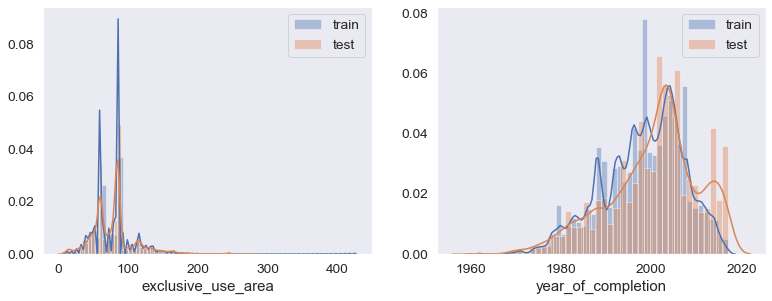

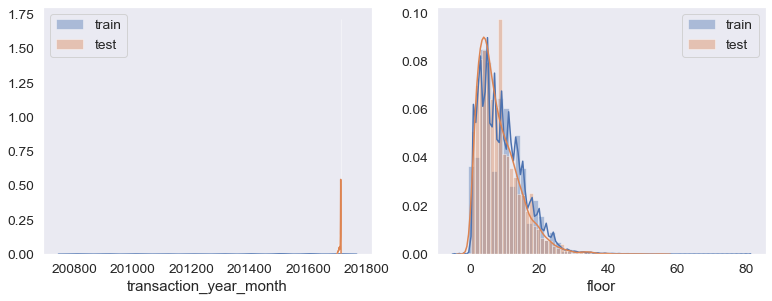

<Figure size 1440x720 with 0 Axes>

In [49]:
ix = 1
fig = plt.figure(figsize = (20, 10))
for c in list(num_cols):
    if ix <= 2:
        ax2 = fig.add_subplot(2, 3, ix+3)
        sns.distplot(train[c].dropna())
        sns.distplot(test[c].dropna())
        plt.legend(['train', 'test'])
        plt.grid()
    ix += 1
    if ix == 3:
        fig = plt.figure(figsize=(20, 10))
        ix = 1
del temp